## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
# Handle filepaths
pollpath = '11-Python Statistics in EDA\chapter4\\04_02\poll.csv'
largepollpath = '11-Python Statistics in EDA\chapter4\\04_02\poll-larger.csv'

In [5]:
poll = pd.read_csv(pollpath)
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [6]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
poll.head()


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [8]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [9]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [10]:
s = sample(0.51,n=1000)

In [11]:
s.vote.value_counts(normalize=True)

Brown    0.504
Green    0.496
Name: vote, dtype: float64

In [12]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [13]:
dist.head()

,Brown,Green
vote,0.517,0.483
vote,0.502,0.498
vote,0.526,0.474
vote,0.519,0.481
vote,0.510,0.490


<AxesSubplot:>

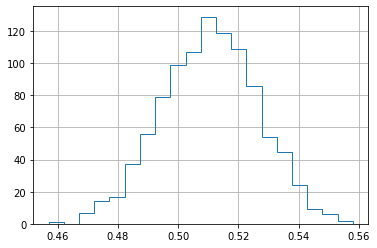

In [14]:
dist.Brown.hist(histtype='step',bins=20)

In [15]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [16]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [17]:
quantiles(0.50)

(0.469, 0.531025)

In [18]:
quantiles(0.48)

(0.448975, 0.513)

In [19]:
quantiles(0.54)

(0.508975, 0.57)

In [20]:
dist = samplingdist(0.50,10000)

<AxesSubplot:>

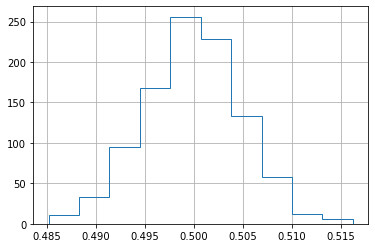

In [21]:
dist.Brown.hist(histtype='step')

In [22]:
largepoll = pd.read_csv(largepollpath)

In [23]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64